# Part 1: Logistic Regression from Scratch

## Step 1: The Dataset

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn . datasets import load_iris
from sklearn . model_selection import train_test_split

# Load the dataset
iris = load_iris ()
X = iris . data [: , [2 , 3]] # Using petal length and petal width
y = iris . target

# --- Case 1: Not Linearly Separable ( Versicolor vs. Virginica ) ---
X_nls_full = X [ y != 0]
y_nls_full = y [ y != 0]
y_nls_full [ y_nls_full == 1] = 0 # Versicolor
y_nls_full [ y_nls_full == 2] = 1 # Virginica
X_train_nls , X_test_nls , y_train_nls , y_test_nls = train_test_split (
    X_nls_full , y_nls_full , test_size =0.3 , random_state =42)


# --- Case 2: Linearly Separable ( Setosa vs. The Rest ) ---
X_ls_full = X
y_ls_full = np . copy ( y )
y_ls_full [ y_ls_full != 0] = 1 # Versicolor and Virginica are class 1
X_train_ls , X_test_ls , y_train_ls , y_test_ls = train_test_split (
   X_ls_full , y_ls_full , test_size =0.3 , random_state =42)

# Helper function to add the bias term (x0 =1)
def add_bias (X) :
   return np . c_ [ np . ones ( X . shape [0]) , X ]


## Step 2: Implement the Core Functions

In [50]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def nll_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

def calculate_gradient(X, y_true, w):
    z = X @ w
    y_pred = sigmoid(z)

    gradient = (X.T @ (y_pred - y_true)) / len(y_true)
    return gradient

## Step 3: Implement the Training Loop

In [68]:
def train_logistic_regression(X, y, learning_rate=0.1, epochs=1000, tol=1e-6):
    # epochs: maximum number of training iterations
    # tol: tolerance for early stopping
    # Add bias term to X
    X_bias = add_bias(X)

    # Initialize weights randomly with small values
    np.random.seed(42)
    w = np.random.randn(X_bias.shape[1]) * 0.01

    # Initialize history lists
    loss_history = []
    grad_norm_history = []

    for epoch in range(epochs):
        # Calculate predictions and loss
        y_pred = sigmoid(X_bias @ w)
        current_loss = nll_loss(y, y_pred)
        loss_history.append(current_loss)

        # Calculate gradient and its norm
        gradient = calculate_gradient(X_bias, y, w)
        grad_norm = np.linalg.norm(gradient)
        grad_norm_history.append(grad_norm)

        # Update weights
        w = w - learning_rate * gradient

        # Print progress every 100 epochs
        if epoch % 200 == 0:
            print(f"Epoch {epoch}: Loss = {current_loss:.4f}, Gradient Norm = {grad_norm:.6f}")

        # Early stopping if gradient is very small
        if grad_norm < tol:
            print(f"Converged at epoch {epoch} with gradient norm {grad_norm:.6f}")
            break

    print(f"Training completed: Final Loss = {loss_history[-1]:.4f}, Final Gradient Norm = {grad_norm_history[-1]:.6f}")
    return w, loss_history, grad_norm_history

## Step 4: Experiments and Comparison

### Task 1: Non-Linearly Separable Case

Epoch 0: Loss = 0.6922, Gradient Norm = 0.516612
Training completed: Final Loss = 0.6025, Final Gradient Norm = 0.079791


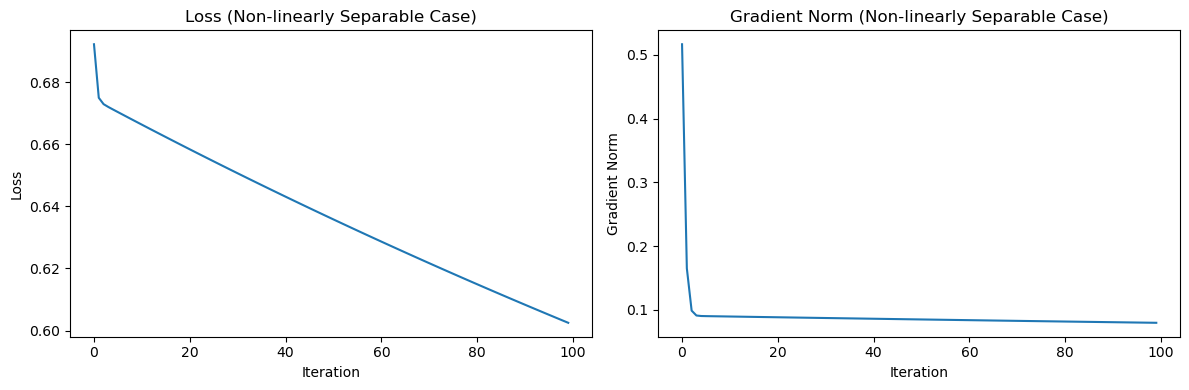

Final weights: [-0.61541227 -0.0093441   0.59404476]
Final loss.: 0.6025
Final gradient norm: 0.0798
Magnitude of weight vector: 0.8554


In [69]:
# Train on the non-linearly separable case
w_nls, loss_nls, grad_norm_nls = train_logistic_regression(
    X_train_nls, y_train_nls, learning_rate=0.1, epochs=100)

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Loss plot    
ax1.plot(loss_nls)
ax1.set_title('Loss (Non-linearly Separable Case)')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')

# Gradient norm plot
ax2.plot(grad_norm_nls)
ax2.set_title('Gradient Norm (Non-linearly Separable Case)')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Gradient Norm')

plt.tight_layout()
plt.show()

print(f"Final weights: {w_nls}")
print(f"Final loss.: {loss_nls[-1]:.4f}")
print(f"Final gradient norm: {grad_norm_nls[-1]:.4f}")
print(f"Magnitude of weight vector: {np.linalg.norm(w_nls):.4f}")

### Task 2: Linearly Separable Case

Epoch 0: Loss = 0.6907, Gradient Norm = 1.603109
Epoch 200: Loss = 0.1801, Gradient Norm = 0.074070
Epoch 400: Loss = 0.1109, Gradient Norm = 0.046331
Epoch 600: Loss = 0.0800, Gradient Norm = 0.033262
Epoch 800: Loss = 0.0628, Gradient Norm = 0.025877
Epoch 1000: Loss = 0.0518, Gradient Norm = 0.021171
Epoch 1200: Loss = 0.0443, Gradient Norm = 0.017921
Epoch 1400: Loss = 0.0387, Gradient Norm = 0.015545
Epoch 1600: Loss = 0.0344, Gradient Norm = 0.013732
Epoch 1800: Loss = 0.0310, Gradient Norm = 0.012305
Epoch 2000: Loss = 0.0283, Gradient Norm = 0.011151
Epoch 2200: Loss = 0.0260, Gradient Norm = 0.010200
Epoch 2400: Loss = 0.0241, Gradient Norm = 0.009401
Epoch 2600: Loss = 0.0225, Gradient Norm = 0.008721
Epoch 2800: Loss = 0.0210, Gradient Norm = 0.008135
Epoch 3000: Loss = 0.0198, Gradient Norm = 0.007624
Epoch 3200: Loss = 0.0187, Gradient Norm = 0.007176
Epoch 3400: Loss = 0.0177, Gradient Norm = 0.006779
Epoch 3600: Loss = 0.0169, Gradient Norm = 0.006424
Epoch 3800: Loss = 

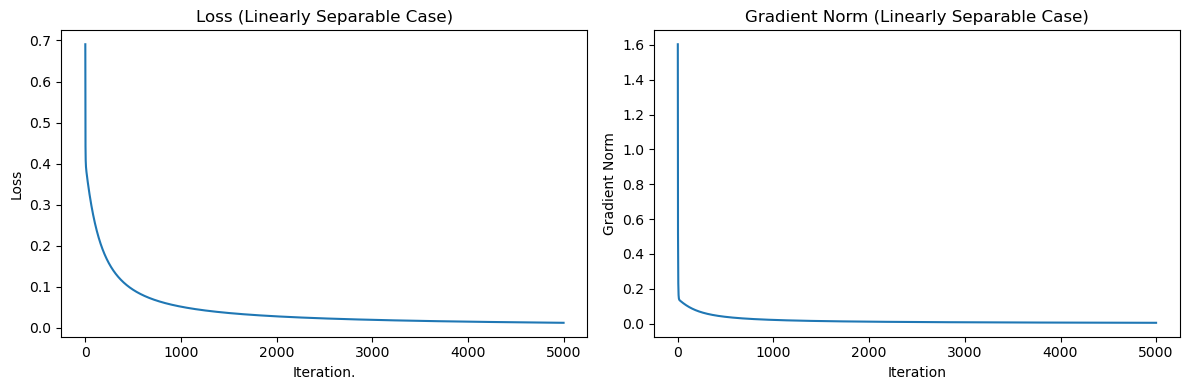

Final weights: [-7.78609421  2.1864702   3.3017574 ]
Final loss: 0.0126
Final gradient norm: 0.0047
Magnitude of weight vector: 8.7353


In [53]:
# Train on the linearly separable case
w_ls, loss_ls, grad_norm_ls = train_logistic_regression(
    X_train_ls, y_train_ls, learning_rate=0.1, epochs=5000)

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Loss plot
ax1.plot(loss_ls)
ax1.set_title('Loss (Linearly Separable Case)')
ax1.set_xlabel('Iteration.')
ax1.set_ylabel('Loss')

# Gradient norm plot
ax2.plot(grad_norm_ls)
ax2.set_title('Gradient Norm (Linearly Separable Case)')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Gradient Norm')

plt.tight_layout()
plt.show()

print(f"Final weights: {w_ls}")
print(f"Final loss: {loss_ls[-1]:.4f}")
print(f"Final gradient norm: {grad_norm_ls[-1]:.4f}")
print(f"Magnitude of weight vector: {np.linalg.norm(w_ls):.4f}")

## Step 5: Fixing the Problem with L2 Regularization

In [67]:
# Regularized loss function
def nll_loss_regularized(y_true, y_pred, w, lambda_reg):
    base_loss = nll_loss(y_true, y_pred)
    reg_term = (lambda_reg / 2) * np.sum(w[1:]**2)  # Don't regularize bias term
    return base_loss + reg_term

# Regularized gradient calculation
def calculate_gradient_regularized(X, y_true, w, lambda_reg):
    gradient = calculate_gradient(X, y_true, w)
    # Add regularization term (excluding bias)
    reg_gradient = lambda_reg * w
    reg_gradient[0] = 0  # Don't regularize bias term
    return gradient + reg_gradient

def train_regularized_lr(X, y, lambda_reg=0.1, learning_rate=0.1, max_iters=1000, tol=1e-4):
    # Add bias term
    X_bias = add_bias(X)

    # Initialize weights
    w = np.zeros(X_bias.shape[1])

    loss_history = []
    grad_norm_history = []

    for i in range(max_iters):
        # Calculate predictions and regularized loss
        y_pred = sigmoid(X_bias @ w)
        loss = nll_loss_regularized(y, y_pred, w, lambda_reg)
        loss_history.append(loss)

        # Calculate regularized gradient
        gradient = calculate_gradient_regularized(X_bias, y, w, lambda_reg)
        grad_norm = np.linalg.norm(gradient)
        grad_norm_history.append(grad_norm)

        # Check convergence
        if grad_norm < tol:
            print(f"Converged after {i+1} iterations")
            break

        # Update weights
        w = w - learning_rate * gradient

    else:
        print(f"Reached maximum iterations. ({max_iters})")

    return w, loss_history, grad_norm_history

Converged after 2897 iterations


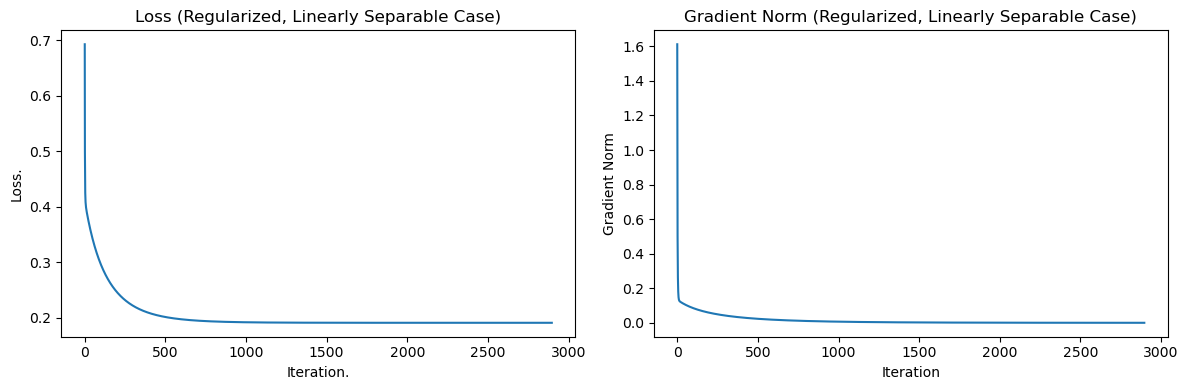

Final weights (regularized): [-3.58931837  1.2254235   0.49068504]
Final loss: 0.1906
Final gradient norm: 0.0001
Magnitude of weight vector: 3.8243


In [65]:
# Training regularized model on linearly separable case
w_ls_reg, loss_ls_reg, grad_norm_ls_reg = train_regularized_lr(
    X_train_ls, y_train_ls, lambda_reg=0.1, learning_rate=0.1, max_iters=5000)

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Loss plot
ax1.plot(loss_ls_reg)
ax1.set_title('Loss (Regularized, Linearly Separable Case)')
ax1.set_xlabel('Iteration.')
ax1.set_ylabel('Loss.')

# Gradient norm plot
ax2.plot(grad_norm_ls_reg)
ax2.set_title('Gradient Norm (Regularized, Linearly Separable Case)')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Gradient Norm')

plt.tight_layout()
plt.show()

print(f"Final weights (regularized): {w_ls_reg}")
print(f"Final loss: {loss_ls_reg[-1]:.4f}")
print(f"Final gradient norm: {grad_norm_ls_reg[-1]:.4f}")
print(f"Magnitude of weight vector: {np.linalg.norm(w_ls_reg):.4f}")

## Step 6: Evaluate Model Performance

Reached maximum iterations. (3000)
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion matrix
[[16  1]
 [ 0 13]]

AUC Score: 0.9729


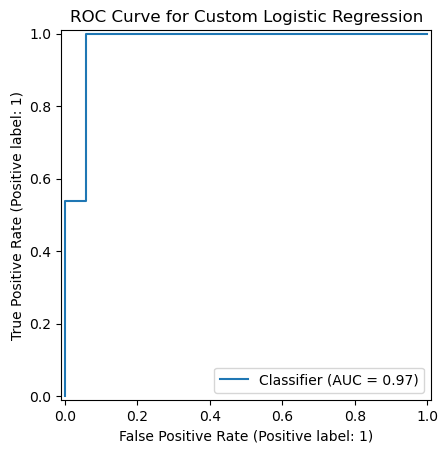

In [74]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# 1. Train regularized model on NLS training data
final_w, _, _ = train_regularized_lr(
    X_train_nls, y_train_nls, lambda_reg=0.1, learning_rate=0.1, max_iters=3000)

# 2. Make predictions on test data
X_test_nls_bias = add_bias(X_test_nls)
probabilities = sigmoid(X_test_nls_bias @ final_w)
y_pred = (probabilities >= 0.5).astype(int)

# Evaluation Code
print("Classification Report")
print(classification_report(y_test_nls, y_pred))

print("\nConfusion matrix")
print(confusion_matrix(y_test_nls, y_pred))

print(f"\nAUC Score: {roc_auc_score(y_test_nls, probabilities):.4f}")

RocCurveDisplay.from_predictions(y_test_nls, probabilities)
plt.title("ROC Curve for Custom Logistic Regression")
plt.show()

# Part 2: Naive Bayes

## Task 1: Intuition Building - Spam Classification by Hand

### 1. Calculate Class Priors
* Total messages = 5
* Spam count = 2
* Ham count = 3

$P(\text{Spam}) = \frac{\text{Spam count}}{\text{Total messages}} = \frac{2}{5} = 0.4$
$P(\text{Ham}) = \frac{\text{Ham count}}{\text{Total messages}} = \frac{3}{5} = 0.6$

---

### 2. Calculate Word Likelihoods
* **Size of Vocabulary (V):** 14
* **Total words in Spam:** 7
* **Total words in Ham:** 13


#### Likelihoods for Spam (Total words = 7, V = 14)
* $P(\text{"free"}|\text{Spam}) = \frac{1 + 1}{7 + 14} = \frac{2}{21}$
* $P(\text{"call"}|\text{Spam}) = \frac{1 + 1}{7 + 14} = \frac{2}{21}$
* $P(\text{"for"}|\text{Spam}) = \frac{0 + 1}{7 + 14} = \frac{1}{21}$
* $P(\text{"you"}|\text{Spam}) = \frac{0 + 1}{7 + 14} = \frac{1}{21}$

#### Likelihoods for Ham (Total words = 13, V = 14)
* $P(\text{"free"}|\text{Ham}) = \frac{0 + 1}{13 + 14} = \frac{1}{27}$
* $P(\text{"call"}|\text{Ham}) = \frac{1 + 1}{13 + 14} = \frac{2}{27}$
* $P(\text{"for"}|\text{Ham}) = \frac{0 + 1}{13 + 14} = \frac{1}{27}$
* $P(\text{"you"}|\text{Ham}) = \frac{2 + 1}{13 + 14} = \frac{3}{27}$

---

### 3. Calculate Posterior Probabilities (Scores)
**Score(Spam):**
$\text{Score}(\text{Spam}) \propto \frac{2}{5} \times \frac{2}{21} \times \frac{2}{21} \times \frac{1}{21} \times \frac{1}{21}$
$\text{Score}(\text{Spam}) \propto \frac{8}{972405} \approx 0.000008227$

**Score(Ham):**
$\text{Score}(\text{Ham}) \propto \frac{3}{5} \times \frac{1}{27} \times \frac{2}{27} \times \frac{1}{27} \times \frac{3}{27}$
$\text{Score}(\text{Ham}) \propto \frac{18}{2657205} \approx 0.000006774$

---

### 4. Classify the Message
Comparing the two scores:
* $\text{Score}(\text{Spam}) \approx 0.000008227$
* $\text{Score}(\text{Ham}) \approx 0.000006774$

Since $\text{Score}(\text{Spam}) > \text{Score}(\text{Ham})$, the message "free call for you" is classified as **Spam**.

## Task 2: Application - Real-World Text Classification

## Step 1: Load the Dataset

In [57]:
from sklearn . datasets import fetch_20newsgroups
categories = ['sci.space', 'talk.religion.misc']
train_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
test_data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

## Step 2: Feature Extraction (Bag-of-Words)

In [58]:
from sklearn . feature_extraction . text import CountVectorizer
vectorizer = CountVectorizer ( stop_words ='english')
X_train = vectorizer . fit_transform ( train_data . data )
X_test = vectorizer . transform ( test_data . data )
y_train = train_data . target
y_test = test_data . target

## Step 3: Train and Evaluate a Multinomial Naive Bayes Classifier

In [59]:
from sklearn . naive_bayes import MultinomialNB
from sklearn . metrics import classification_report

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=train_data.target_names))

                    precision    recall  f1-score   support

         sci.space       0.97      0.99      0.98       394
talk.religion.misc       0.99      0.96      0.97       251

          accuracy                           0.98       645
         macro avg       0.98      0.98      0.98       645
      weighted avg       0.98      0.98      0.98       645



## Step 4: Hands-On Analysis - Looking Inside the Model

In [60]:
# Select a document
doc_index = 10
doc_vector = X_test[doc_index]

# Get the model's prediction
model_prediction = model.predict(doc_vector)[0]
predicted_class_name = train_data.target_names[model_prediction]

print(f"Model's Prediction: '{predicted_class_name}'")

# --- Manually calculate the score for each class ---
# train_data.target_names[0] is 'sci.space'
# train_data.target_names[1] is 'talk.religion.misc'
log_prior_space = model.class_log_prior_[0]
log_prior_religion = model.class_log_prior_[1]

log_likelihoods_space = model.feature_log_prob_[0, :]
log_likelihoods_religion = model.feature_log_prob_[1, :]

# The dot product sums the log-likelihoods for the words present in the document
# This works because doc_vector[i] is the count of word i, and log(P(x_i|c)^count) = count * log(P(x_i|c))
# The dot product efficiently computes: sum(doc_vector[i] * log_likelihoods[i] for all words i)
score_space = log_prior_space + doc_vector.dot(log_likelihoods_space)
score_religion = log_prior_religion + doc_vector.dot(log_likelihoods_religion)

# --- Your code here to print the scores and verify the result ---
print(f"\n Manual calculation")
print(f"Log-Score for 'sci.space': {score_space}")
print(f"Log-Score for 'talk.religion.misc': {score_religion}")

# Determine the manual prediction
if score_space > score_religion:
    manual_class_name = train_data.target_names[0]
else:
    manual_class_name = train_data.target_names[1]

print(f"Manual calculation prediction: '{manual_class_name}'")

# Verify the result
if manual_class_name == predicted_class_name:
    print("\nVerification: manual calculation matches model prediction.")
else:
    print("\nVerification: no.")

Model's Prediction: 'talk.religion.misc'

 Manual calculation
Log-Score for 'sci.space': [-698.6741132]
Log-Score for 'talk.religion.misc': [-617.91260235]
Manual calculation prediction: 'talk.religion.misc'

Verification: manual calculation matches model prediction.
